# Hw #2 Integration at Work

### Physics 177, Spring 2017 (Prof. Tanedo)

##### Due: Tuesday, April 25

#### Henry Casarez 

#### I'm **really**  <u> **so**</u> sorry for not putting this on the original hw repository but I promise I will do that next time for sure!!! 

## 1. Simpson's Rule Code

In [14]:
def integrate_HW2(f,a,b,N):
    """
    Integrate f from a to b using Simpson's rule with N steps
    """ 
    xval=(b-a)/N
    sample=xval
    value = 0.0
    while (sample < b):
        value = value + (((xval)/3)*((f(sample -xval))+(4.0*(f(sample)))+f(sample + xval)))
        sample = sample +2*xval
    return value 
    

##### test function

In [16]:
def test_function(x):
    return 4.0*x**3

integrate_HW2(test_function,0,1,100)

1.0000000000000013

## 2. Diffraction of a Telescope

##### Coding the Bessel Function

In [26]:
from math import pi as pi
from math import sin as sin
from math import cos as cos

def J(m,x):
    
    def Bessel(theta):
        return (cos((m*theta)-(x*sin(theta))))
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 steps
    """
    

    # Use the integrate_HW2 function from Problem 1
   
    myVal = integrate_HW2(Bessel,0,pi,1000)
    
    return (1/pi)*myVal 


In [28]:
J(1,1)

0.4400505857449238

##### Plotting the bessel Function

In [32]:

import matplotlib.pyplot as plt
import numpy as np

##%matplotlib inline ## uncomment if necessary

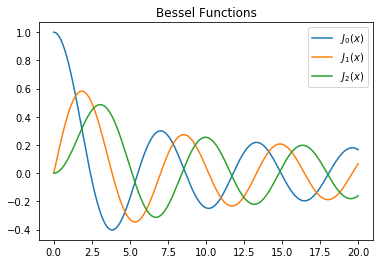

In [35]:
# Create a Numpy array of sampling points
x = np.linspace(0, 20, 1000)

# Create a "vectorized" version of J(m,x) that 
# accepts Numpy arrays as arguments
Jnp = np.vectorize(J)
plt.plot(x, Jnp(0,x), label='$J_0(x)$')
plt.plot(x, Jnp(1,x), label='$J_1(x)$')
plt.plot(x, Jnp(2,x), label='$J_2(x)$')

         # FILL THIS IN
         

# FILL IN THE REST
# Make sure to include plot labels

plt.title("Bessel Functions")
plt.legend()
plt.show()

##### Comparing Sines

In [52]:
def F(m,x):
    return ((2/(pi*x))**(1/2))*(cos(pi-((((2*m)+1)*pi)/4)))

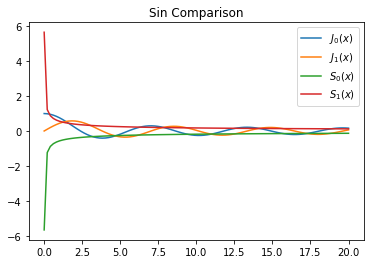

In [60]:
# Create a Numpy array of sampling points
x = np.linspace(0.01, 20, 100)

# Create a "vectorized" version of J(m,x) that 
# accepts Numpy arrays as arguments
Jnp = np.vectorize(J)
Snp = np.vectorize(F)
plt.plot(x, Jnp(0,x), label='$J_0(x)$')
plt.plot(x, Jnp(1,x), label='$J_1(x)$')
plt.plot(x, Snp(0,x), label='$S_0(x)$')
plt.plot(x, Snp(1,x), label='$S_1(x)$')
         # FILL THIS IN
         

# FILL IN THE REST
# Make sure to include plot labels

plt.title("Sin Comparison")
plt.legend()
plt.show()

##### Plotting Diffraction Patterns

In [101]:
def I(lam,r):
    k=(2*pi)/(lam)
    z=k*r
    return (((J(1,z))/z)**2)

In [134]:
vectorI= np.vectorize(I)

In [135]:
from math import sqrt 
side = np.linspace(-750,750,200)
X,Y = np.meshgrid(side,side)
Z = np.sqrt(X**2+Y**2)
lovely= vectorI(500,Z)

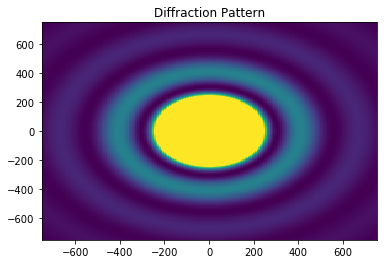

In [136]:
plt.pcolormesh(X,Y,lovely, vmax=0.01)
plt.title("Diffraction Pattern")
plt.show()

### Playing With Colors

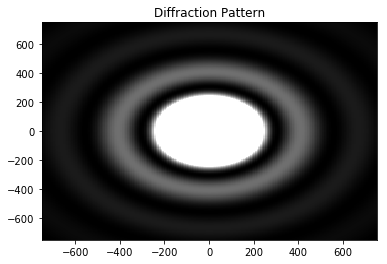

In [117]:
plt.pcolormesh(X,Y,IR, vmax=0.01, cmap= 'gray')
plt.title("Diffraction Pattern")
plt.show()

## 3. Gaussian Quad

In [130]:
from numpy import ones,copy,cos,tan,pi,linspace



def gaussxw(N):



    # Initial approximation to roots of the Legendre polynomial

    a = linspace(3,4*N-1,N)/(4*N+2)

    x = cos(pi*a+1/(8*N*N*tan(a)))



    # Find roots using Newton's method

    epsilon = 1e-15

    delta = 1.0

    while delta>epsilon:

        p0 = ones(N,float)

        p1 = copy(x)

        for k in range(1,N):

            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)

        dp = (N+1)*(p0-x*p1)/(1-x*x)

        dx = p1/dp

        x -= dx

        delta = max(abs(dx))



    # Calculate the weights

    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)



    return x,w



def gaussxwab(N,a,b):

    x,w = gaussxw(N)

    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [131]:
def z(x):
    return x**4 - 2*x + 1

N=3    # number of steps
a=0.0  # lower limit of integration
b=2.0  # upper limit of integration

x,w = gaussxw(N)
# gaussxw(N) returns the sample points x and weights w
# for the reference integral (-1,1)

# Now define x' and w' to be the sample points and weights
# for the interval (a,b). We derived this transformation
# in lecture 5.
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Now estimate the integral of f by summing
# the sample points and the weights
total = 0.0
for k in range(N):
    total += wp[k]*f(xp[k])
    
print(s)

TypeError: f() missing 1 required positional argument: 'x'

### Okay so for this entire gaussian quadriture problem, first of all I've never heard of Gaussien Quadriture in my life. It sounds really weird. I tried to google it and it seems like <u> **a lot** </u>. AAAAHHHH!!  Also I tried but I can't get the gaussxw.py to be in the same directory as the notebook because I don't know how to work this that well yet. I wish I could say and do more omg I'm so sorry!!!!! 

# 4. Simpsons Rule Error From HW 1

#### The entire Simpson's rule, atleast when compared to the trapezoidal rule is that it uses Parabolas to take an integral. So it would be more accurate than trapezoidal. However, that also means that it would have a weird error. Wheareas using the rigid set shape of a trapezoid to take a integral causes a set error that is for the most part unchanging, a porabola has curves. It's not linear and is always changing so thus it stands to reason that it's error would be changing too. 

# EC Approximation Error: $ \frac {(b - a)^5} {180 n^4}$